# 对表6-3的内容进行分析
表6-3给出了耐用品支出与个人消费支出之间的关系，均以2000年的十亿美元计，其中：
- PCEXP表示个人消费总支出
- EXPDUR表示耐用品支出
- EXONONDUR表示非耐用品支出
- EXPSERVICES表示劳务支出

## 下面分析各类支出了与个人消费总支出的关系

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("tb6_3.csv")

In [3]:
df.head()

,Unnamed: 0,EXPSERVICES,EXPDUR,EXPNONDUR,PCEXP
0,2003-I,4143.3,971.4,2072.5,7184.9
1,2003-II,4161.3,1009.8,2084.2,7249.3
2,2003-III,4190.7,1049.6,2123.0,7352.9
3,2003-IV,4220.2,1051.4,2132.5,7394.3
4,2004-I,4268.2,1067.0,2155.3,7479.8


In [4]:
df.describe()

,EXPSERVICES,EXPDUR,EXPNONDUR,PCEXP
count,15.000000,15.000000,15.000000,15.000000
mean,4356.933333,1106.386667,2219.333333,7668.300000
std,137.626579,70.334109,97.536240,297.328544
min,4143.300000,971.400000,2072.500000,7184.900000
25%,4244.200000,1059.200000,2143.900000,7437.050000
50%,4377.400000,1110.300000,2213.100000,7687.100000
75%,4465.600000,1163.350000,2298.600000,7902.750000
max,4566.600000,1208.800000,2360.100000,8111.200000


首先，我们分析耐用品支出（EXPDUR）与个人消费总支出（PCEXP）之间的关系。
首先，画出散点图：

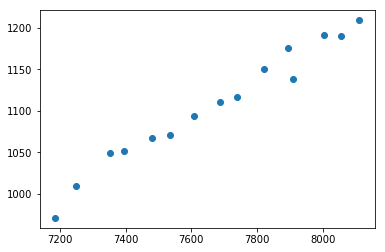

In [5]:
plt.scatter(df['PCEXP'], df['EXPDUR'])

这似乎是一个线性关系。再来看看两者取自然对数时的关系：

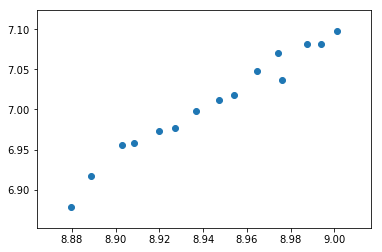

In [6]:
plt.scatter(np.log(df['PCEXP']), np.log(df['EXPDUR']))

首先还是根据教科书的内容求出取对数时的线性拟合吧：

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\bangu_000\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
mod = sm.OLS(np.log(df['EXPDUR']), np.log(df['PCEXP']))
res = mod.fit()

In [9]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                 EXPDUR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.132e+05
Date:                Sun, 25 Jun 2017   Prob (F-statistic):           6.77e-34
Time:                        18:46:40   Log-Likelihood:                 29.668
No. Observations:                  15   AIC:                            -57.34
Df Residuals:                      14   BIC:                            -56.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PCEXP          0.7834      0.001    783.095      0.0

C:\Users\bangu_000\Anaconda2\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


## 下面分析劳务支出的增长率
首先做出劳动支出的散点图，观察其趋势：

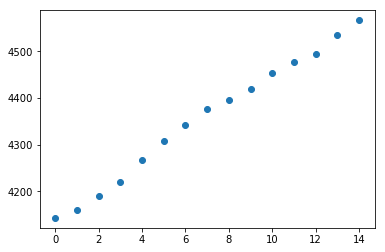

In [12]:
plt.scatter(df.index, df['EXPSERVICES'])

对纵轴的值取自然对数再画一次：

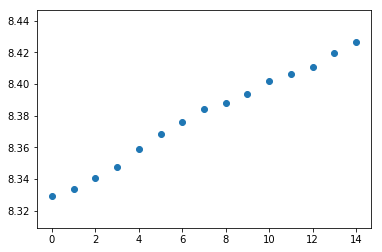

In [13]:
plt.scatter(df.index, np.log(df['EXPSERVICES']))